# Multi-classifier Model for evaluating tweets

## 1. Problem Area
In modern society, the Internet has allowed us to form connections with people around the world. It has exposed us to a wide variety of opinions and information, which has also indirectly made it easier for our opinions to be influenced by others. As such, it has become essential for businesses to understand consumer needs by analysing reviews from their users. However, when large businesses receive reviews, the large quantity of reviews cannot possibly be evaluated by a human. Therefore, there is a need for useful information to be extracted from the mass of reviews given to businesses. 

## 2. Objectives 
This project can help to form the foundation of a review analysis bot that can help generate insights for companies. My goal is to create a classifier that can detect the subjectivity of a review. By filtering and sorting reviews, it will become possible to extract useful information from the reviews to improve business. For example, more objective reviews could be seriously evaluated as quantitative suggestions for store improvement, whereas subjective reviews could be looked into as customer relations.

## 3. Dataset


McDonalds is Multi National Corporation(MNC) that runs a fast food restaurant chain. McDonalds runs on a model that requires their food to be consistent(excluding some special cases) in taste, quality and service. This is just one example of a company that can potentially benefit from such a bot. Instead of manually filtering through multiple reviews, a sentiment analysis bot can be used to classify reviews. 
<br>McDonald is a prime example of a relevant business and this dataset contains reviews from stores in the United States, scraped from Google reviews. 
<br>I have taken this data from Kaggle, an open source dataset website. <br>The link to the data is included below.<br>
https://www.kaggle.com/datasets/nelgiriyewithana/mcdonalds-store-reviews<br>

The dataset is a CSV file containing 33396 rows and 10 columns.
The following is the data types contained within the CSV:<br>
reviewer_id int64 <br>
store_name object<br>
category object<br>
store_address object<br>
latitude  float64<br>
longitude float64<br>
rating_count object<br>
review_time object<br>
review object<br>
rating object

## 4. Evaluation methodology

The data will be explored, and split into training and testing sets. The distribution of labels will be observed and if necessary, balanced.<br>
After evaluating and selecting a model, I will preprocess the data to be fit into the model. The model choice will depend on the dataset and the aspects of the data. <br>
I will be evaluating the results using Precision, Recall, Accuracy, f1-score, and a Confusion Matrix.<br>
Precision will measure the accuracy of positive predictions made by the model.<br>
Recall is to check the model's ability to correctly identify positive instances.<br>
Accuracy will verify the overall correctness of the predictions made by the model.<br>
F1-score will be a measure of the balance between precision and recall.<br>

Importing Libraries

In [76]:
# EDA
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# nltk libraries
import nltk 
nltk.download('all')

# stopwords
from nltk.corpus import stopwords

# stemmer & lemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# tokenizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

# re
import re,string,unicodedata

# bag of words
from textblob import TextBlob
from textblob import Word

# oversampling
from imblearn.over_sampling import SMOTE

# feature Extraction 
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# grid search
from sklearn.model_selection import GridSearchCV

# metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score
from sklearn.metrics import ConfusionMatrixDisplay

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]    |   Pac

In [77]:
# seed for random to make it reproducible
SEED = 42

## Import Dataset

In [78]:
df = pd.read_csv("McDonald_s_Reviews.csv", encoding='latin-1')
df.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,Why does it look like someone spit on my food?...,1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,It'd McDonalds. It is what it is as far as the...,4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and che...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, a...",1 star


In [79]:
df.shape

(33396, 10)

In [80]:
df.describe()

,reviewer_id,latitude,longitude
count,33396.000000,32736.000000,32736.000000
mean,16698.500000,34.442546,-90.647033
std,9640.739131,5.344116,16.594844
min,1.000000,25.790295,-121.995421
25%,8349.750000,28.655350,-97.792874
50%,16698.500000,33.931261,-81.471414
75%,25047.250000,40.727401,-75.399919
max,33396.000000,44.981410,-73.459820


In [81]:
df.dtypes

reviewer_id        int64
store_name        object
category          object
store_address     object
latitude         float64
longitude        float64
rating_count      object
review_time       object
review            object
rating            object
dtype: object

## Data Preprocessing

In this case, we are only concerned by the reviews and the rating given to them. <br>
We can ignore the null values as we will be dropping the column.

In [82]:
# check for null values
df.isnull().sum()

reviewer_id        0
store_name         0
category           0
store_address      0
latitude         660
longitude        660
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

In [83]:
# check for duplicates
df.duplicated().sum()

0

In [84]:
# remove unnecessary data
review_data = df[["review","rating"]]

In [85]:
review_data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1 star
1,It'd McDonalds. It is what it is as far as the...,4 stars
2,Made a mobile order got to the speaker and che...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5 stars
4,"I repeat my order 3 times in the drive thru, a...",1 star


In [86]:
# remove the star(s) from rating
review_data['rating'] = review_data['rating'].str.split().str[0]
review_data['rating'] = review_data['rating'].astype(int)
review_data.head()

,review,rating
0,Why does it look like someone spit on my food?...,1
1,It'd McDonalds. It is what it is as far as the...,4
2,Made a mobile order got to the speaker and che...,1
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿...,5
4,"I repeat my order 3 times in the drive thru, a...",1


In [87]:
# initalise lemmatizer variable 
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))

In [88]:
# processing review data
def review_processor(review_data):
    # changing all review texts to be lowercase
    review_data = str(review_data).lower()

    # removing punctuation
    review_data = re.sub('\[.*?\]', '', review_data)

    # removing random standalone alphabets 
    review_data = re.sub("[^a-z\s]", "", review_data)

    # removing hashtags
    review_data = re.sub("#", " ", review_data)

    #Removing hyperlinks
    review_data = re.sub('https?://\S+|www\.\S+', '', review_data)

    review_data = re.sub('<.*?>+', '', review_data)

    review_data = re.sub('[%s]' % re.escape(string.punctuation), '', review_data)

    # removing lines separated by \n
    review_data = re.sub('\n', '', review_data)

    review_data = re.sub('\w*\d\w*', '', review_data)
    # second code satisfy those conditions that weren't covered in the first line of code (Above)

    # removing stopwords
    review_data = [word for word in review_data.split(' ') if word not in stopword]
    review_data =" ".join(review_data)

    # lemmatize 
    review_data = [lemmatizer.lemmatize(word) for word in review_data.split(' ')]
    review_data=" ".join(review_data)

    return review_data

In [89]:
# run review processor
review_data['review'] = review_data['review'].apply(review_processor)

In [90]:
review_data.head(10)

,review,rating
0,look like someone spit foodi normal transactio...,1
1,itd mcdonalds far food atmosphere go staff mak...,4
2,made mobile order got speaker checked inline m...,1
3,mc crispy chicken sandwich customer service q...,5
4,repeat order time drive thru still manage mes...,1
5,work door dash locked u wait long line reason ...,1
6,could give location zero customer service wo...,1
7,came ordered large coffee wno ice handed cup l...,1
8,went thru drive thru ordered getting home noti...,1
9,im really huge fan fast food teenage daughter...,4


In [91]:
review_data.dtypes

review    object
rating     int32
dtype: object

In [92]:
# Initialising the SentimentIntensityAnalyzer method
sen_analyser = SentimentIntensityAnalyzer()

In [93]:
# get subjectivity of data
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

In [94]:
review_data["Subjectivity"] = review_data["review"].apply(getSubjectivity)

In [95]:
def getPerspectiveLabel(score):
    if score < 0.5:
        return "objective"
    elif score > 0.5:
        return "subjective"
    else:
        return "moderate"

In [96]:
review_data["perspective"] = review_data["Subjectivity"].apply(getPerspectiveLabel)

In [97]:
review_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33396 entries, 0 to 33395
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   review        33396 non-null  object 
 1   rating        33396 non-null  int32  
 2   Subjectivity  33396 non-null  float64
 3   perspective   33396 non-null  object 
dtypes: float64(1), int32(1), object(2)
memory usage: 913.3+ KB


## EDA

In [98]:
# counting sentiments
review_data['perspective'].value_counts()

subjective    20487
objective     11191
moderate       1718
Name: perspective, dtype: int64

<Axes: xlabel='perspective', ylabel='count'>

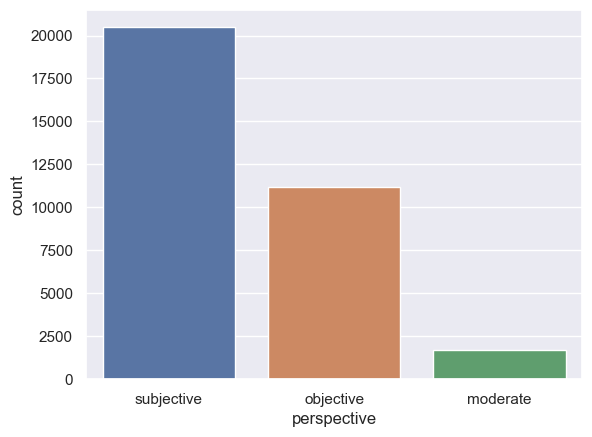

In [99]:
# data visualisation
sns.set_theme(style='darkgrid')
sns.countplot(x=review_data['perspective'])

In [100]:
# split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(review_data["review"],
                                                    review_data["perspective"],
                                                    test_size=0.3,random_state=SEED)

In [101]:
# initialise TF-IDF vectorizer
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train).toarray()
X_test_tfidf = tfidf.transform(X_test).toarray()

## Baseline model - Multinomial Naive Bayes

### Why Multinomial Naive Bayes
1. Discrete Features: Multinomial Naive Bayes is specifically designed for working with discrete feature data, making it suitable for sentiment analysis related tasks

2. Large Feature Space: Multinomial Naive Bayes algorithm is simplistic but it can handle with large feature spaces

3. Bag-of-Words: Multinomial Naive Bayes takes into account prior probabilities(the class) when calculating feature probabilities, making it capable of using the bag-of-words as features.

This makes it suitable as my baseline algorithm

In [102]:
# create baseline model
baseline_model = MultinomialNB()
baseline_model.fit(X_train_tfidf,y_train)

MultinomialNB()

In [103]:
base_y_pred = baseline_model.predict(X_test_tfidf)

### Baseline model evaluation

In [104]:
# calculate classification report
classification_rep = classification_report(y_test, base_y_pred)

# print the classification report
print(classification_rep)

              precision    recall  f1-score   support

    moderate       0.00      0.00      0.00       520
   objective       0.89      0.48      0.62      3337
  subjective       0.73      0.98      0.84      6162

    accuracy                           0.76     10019
   macro avg       0.54      0.49      0.49     10019
weighted avg       0.75      0.76      0.72     10019



In [105]:
# metric scores
baseline_precision = precision_score(base_y_pred, y_test, average='macro')
baseline_recall = recall_score(base_y_pred, y_test, average='macro')
baseline_acc = accuracy_score(base_y_pred, y_test)
print('Precision: {:.2f}%'.format(baseline_precision*100))
print('Recall: {:.2f}%'.format(baseline_recall*100))
print('Accuracy: {:.2f}%'.format(baseline_acc*100))

Precision: 48.59%
Recall: 54.19%
Accuracy: 76.14%


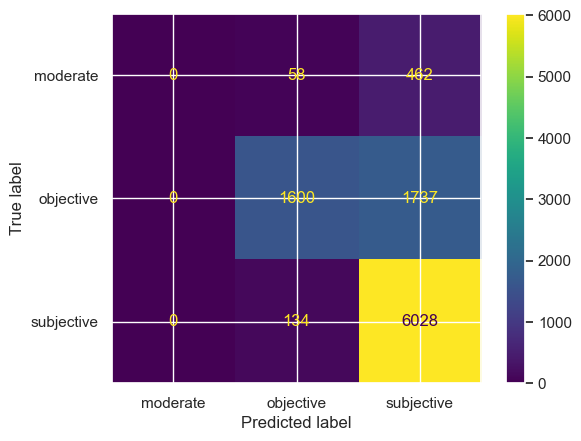

In [106]:
base_cm = confusion_matrix(y_test, base_y_pred, labels = baseline_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = base_cm, display_labels = baseline_model.classes_)
display.plot()

### Notes on evaluation
A precision score of 48.59% means that less than half of the instances that were predicted as positive were actually positive, indicating a large number of false positives. <br>
The recall score of 54.19% means that only 54.19% of the actual positive instances were correctly identified, the rest were false negatives. <br>
The accuracy score of 76.14% means that most of the instances were correctly predicted, however, this is not necessarily a good thing by itself. <br>
Based on the confusion matrix, none of the instances were predicted to be moderate. <br>
This is likely the result of the imbalance in classes, however, I will not be trying to mitigate this.

## Classification Approach

The labels my classifier will focus on is the perspective labels, as it will help to classify reviews as either more subjective(subjective), more objective(objective), or moderate(moderate). The labels are created based on subjectivity score, which is not an indicator that the review has vested motives but rather the meaning is that of the viewpoint they write from. <br><br>
I will be using a logistic regression as it performs well when the decision boundary is relatively simple and it can handle multiclass features well. Furthermore, if the scale is larger, for example, in a large business there may be tens of thousands of reviews, then alternatives like Support Vector Machines(SVM) may be too memory intensive and computationally expensive.
While real world problems tend to be non-linear, which logistic regression is not as suitable for, the size of the dataset makes me hesitant to select other options. If the intention was to design a classifier for smaller businesses, a SVM may be more appropriate to model the data.
<br> Similarly, decision trees do not perform too well in large datasets due to overfitting and computational complexity. However, some potential advantages of a decision tree would also be the ability to handle non-linear relationships and also measure feature importance.

#### Oversampling to balance classes

In [107]:
smote = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_tfidf, y_train)

model = LogisticRegression()
model.fit(X_train_oversampled, y_train_oversampled)

In [108]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [109]:
y_pred = model.predict(X_test_tfidf)

### Preliminary Evaluation

In [110]:
# calculate classification report
model_classification_rep = classification_report(y_test, y_pred)

# print the classification report
print(model_classification_rep)

              precision    recall  f1-score   support

    moderate       0.88      0.43      0.58       520
   objective       0.88      0.91      0.89      3337
  subjective       0.93      0.96      0.95      6162

    accuracy                           0.91     10019
   macro avg       0.90      0.77      0.81     10019
weighted avg       0.91      0.91      0.91     10019



In [111]:
# metric scores
model_precision = precision_score(y_pred, y_test, average='macro')
model_recall = recall_score(y_pred, y_test, average='macro')
model_acc = accuracy_score(y_pred, y_test)
print('Precision: {:.2f}%'.format(model_precision*100))
print('Recall: {:.2f}%'.format(model_recall*100))
print('Accuracy: {:2f}%'.format(model_acc*100))

Precision: 76.59%
Recall: 89.55%
Accuracy: 91.276575%


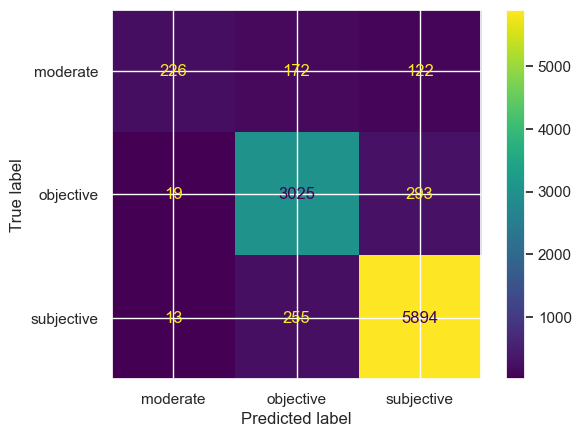

In [112]:
cm = confusion_matrix(y_test, y_pred, labels = baseline_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = baseline_model.classes_)
display.plot()

#### Notes on Preliminary Evaluation
For the "moderate" class, only 48% of the predictions were correctly classified as "moderate", 72% of the actual "moderate" class instances were correctly identified, and therefore the 0.57 f1-score indicates that the model's performance in precision and recall for the "moderate" class is moderate. <br>
For the "objective" class, 86% of instances predicted as "objective" were correctly classified, 89% of the actual "objective" class instances were correctly identified, and the f-1 score of 0.87 means that it is performing well.<br>
For the "subjective" class, 96% of instances predicted as "subjective" were correctly classified, 90% of actual "subjective" instances were correctly identified, and the f1-score of 0.93 means that it is performing well.

### Hyperparameter tuning

In [113]:
# define parameter grid for tuning regularization strength
param_grid = {
    'C': [0.01, 0.1, 1, 10],
}

In [114]:
# instantiate gridsearch 
grid_search = GridSearchCV(model, param_grid)


In [115]:
# fit gridsearch
grid_search.fit(X_train_oversampled, y_train_oversampled)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [119]:
# predicting target based on test feature
tuned_y_pred = grid_search.predict(X_test_tfidf)

In [123]:
# calculate classification report
tuned_classification_rep = classification_report(y_test, tuned_y_pred)

# print the classification report
print(tuned_classification_rep)

              precision    recall  f1-score   support

    moderate       0.59      0.71      0.64       520
   objective       0.90      0.92      0.91      3337
  subjective       0.97      0.94      0.95      6162

    accuracy                           0.92     10019
   macro avg       0.82      0.86      0.84     10019
weighted avg       0.93      0.92      0.92     10019



In [125]:
# metric scores
tuned_precision = precision_score(tuned_y_pred, y_test, average='macro')
tuned_recall = recall_score(tuned_y_pred, y_test, average='macro')
tuned_acc = accuracy_score(tuned_y_pred, y_test)
print('Precision: {:.2f}%'.format(tuned_precision*100))
print('Recall: {:.2f}%'.format(tuned_recall*100))
print('Accuracy: {:2f}%'.format(tuned_acc*100))

Precision: 85.53%
Recall: 81.99%
Accuracy: 92.095019%


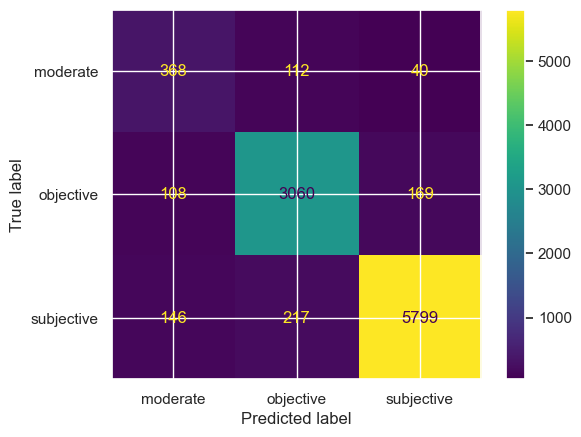

In [124]:
tuned_cm = confusion_matrix(y_test, tuned_y_pred, labels = baseline_model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = tuned_cm, display_labels = baseline_model.classes_)
display.plot()

## Final Evaluation 

Based on the tuned model's metrics, we can observe that the tuning has improved the model's overall performance. <br>
Both macro average and weighted average metrics show overall improvements, while accuracy has improved. <br>
While the precision of the "moderate" class prediction has fallen, the recall has improved significantly, showing a f1-score improvement of +0.04. <br> 
This means that the model is making more false positive predictions for the "moderate" class, however, the model is also correctly identifying more positive instances, reducing the number of false negatives. <br>
In conclusion, the classifier is now better able to identify "moderate" reviews while having good performance at identifying "objective" and "subjective" reviews.

| TUNED |precision|recall|f1-score|support| --- | ORIGINAL |precision|recall|f1-score|support|
| --- | --- | --- | --- | --- | --- |--- | --- | --- | --- | --- | 
|moderate|0.59|0.71|0.64|520|--- |moderate|       0.88|      0.43|      0.58|       520|
|objective|0.90|0.92|0.91|3337| --- |objective|       0.88|      0.91|      0.89|      3337|
|subjective|0.97|0.94|0.95|6162| --- |subjective|       0.93|      0.96|      0.95|      6162|
|accuracy|  |  |0.92|10019| --- |accuracy|  |  | 0.91|     10019|
|   macro avg|0.82|0.86|0.84|10019| --- | macro avg|       0.90|      0.77|      0.81|     10019|
|weighted avg|0.93|0.92|0.92|10019| --- | weighted avg|       0.91|      0.91|      0.91|     10019|

## Summary

This project if further developed with the aid of deep learning and deeper research into corporate needs can be the basis of a review text mining algorithm. As of right now, this is just a simple machine learning model that is replicable. However, if the relevant research and concepts were to be made available to me, I look forward to further building upon this model. This is just an iteration before the next development and I believe that a better understanding of linguistics and economics would help this project flourish. 